In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor




from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.linear_model import LinearRegression
import numpy as np

import os 
import google.generativeai as genai

import shap
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
gemini_key = os.getenv('Google_API_KEY1')
genai.configure(api_key=gemini_key)
model = genai.GenerativeModel('gemini-2.5-flash-lite')

# Introduction to dataset

### Context

### Column Descriptions
* **% Iron Feed** : % of Iron that comes from the iron ore that is being fed into the flotation cells
* **% Silica Feed** : % of silica (impurity) that comes from the iron ore that is being fed into the flotation cells
* **Starch Flow** : Starch (reagent) Flow measured in m3/h (cubic meter per hour)
* **Amina Flow** : Amina (reagent) Flow measured in m3/h (cubic meter per hour)
* **Ore Pulp Flow** : t/h (Tons per Hour)
* **Ore Pulp pH** : pH scale from 0 to 14
* **Ore Pulp Density** : Density scale from 1 to 3 kg/cm³
* **Flotation Column Air Flow** : Air flow that goes into the flotation cell measured in Nm³/h (Normal Cubic Meter per Hour)
* **Flotation Column Level** : Froth level in the flotation cell measured in mm (millimeters)
* **% Iron Concentrate** : % of Iron which represents how much iron is presented in the end of the flotation process (0-100%, lab measurement)
* **% Silica Concentrate** : % of silica which represents how much iron is presented in the end of the flotation process (0-100%, lab measurement)

In [3]:
data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv',
                   decimal=',', parse_dates=['date'], infer_datetime_format=True)

In [4]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [5]:
# Printing the rows and columns
print('Rows:',data.shape[0])
print ('Columns:',data.shape[1])

Rows: 737453
Columns: 24


In [6]:
data.dtypes #DataTypes of the columns

date                            datetime64[ns]
% Iron Feed                            float64
% Silica Feed                          float64
Starch Flow                            float64
Amina Flow                             float64
Ore Pulp Flow                          float64
Ore Pulp pH                            float64
Ore Pulp Density                       float64
Flotation Column 01 Air Flow           float64
Flotation Column 02 Air Flow           float64
Flotation Column 03 Air Flow           float64
Flotation Column 04 Air Flow           float64
Flotation Column 05 Air Flow           float64
Flotation Column 06 Air Flow           float64
Flotation Column 07 Air Flow           float64
Flotation Column 01 Level              float64
Flotation Column 02 Level              float64
Flotation Column 03 Level              float64
Flotation Column 04 Level              float64
Flotation Column 05 Level              float64
Flotation Column 06 Level              float64
Flotation Col

# Descriptive Analytics

In [7]:
data.drop(columns=['date'], inplace=True)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
% Iron Feed,737453.0,56.294739,5.157744,42.740000,52.670000,56.080000,59.720000,65.78000
% Silica Feed,737453.0,14.651716,6.807439,1.310000,8.940000,13.850000,19.600000,33.40000
Starch Flow,737453.0,2869.140569,1215.203734,0.002026,2076.320000,3018.430000,3727.730000,6300.23000
Amina Flow,737453.0,488.144697,91.230534,241.669000,431.796000,504.393000,553.257000,739.53800
Ore Pulp Flow,737453.0,397.578372,9.699785,376.249000,394.264000,399.249000,402.968000,418.64100
Ore Pulp pH,737453.0,9.767639,0.387007,8.753340,9.527360,9.798100,10.038000,10.80810
Ore Pulp Density,737453.0,1.680380,0.069249,1.519820,1.647310,1.697600,1.728330,1.85325
Flotation Column 01 Air Flow,737453.0,280.151856,29.621288,175.510000,250.281000,299.344000,300.149000,373.87100
Flotation Column 02 Air Flow,737453.0,277.159965,30.149357,175.156000,250.457000,296.223000,300.690000,375.99200
Flotation Column 03 Air Flow,737453.0,281.082397,28.558268,176.469000,250.855000,298.696000,300.382000,364.34600


In [9]:
for col in data.columns:
    std_percentage = (data[col].std() / data[col].mean()) * 100
    print(f'For column {col}, std percentage = {std_percentage:.2f}%')

For column % Iron Feed, std percentage = 9.16%
For column % Silica Feed, std percentage = 46.46%
For column Starch Flow, std percentage = 42.35%
For column Amina Flow, std percentage = 18.69%
For column Ore Pulp Flow, std percentage = 2.44%
For column Ore Pulp pH, std percentage = 3.96%
For column Ore Pulp Density, std percentage = 4.12%
For column Flotation Column 01 Air Flow, std percentage = 10.57%
For column Flotation Column 02 Air Flow, std percentage = 10.88%
For column Flotation Column 03 Air Flow, std percentage = 10.16%
For column Flotation Column 04 Air Flow, std percentage = 0.86%
For column Flotation Column 05 Air Flow, std percentage = 1.21%
For column Flotation Column 06 Air Flow, std percentage = 10.35%
For column Flotation Column 07 Air Flow, std percentage = 9.86%
For column Flotation Column 01 Level, std percentage = 25.18%
For column Flotation Column 02 Level, std percentage = 24.52%
For column Flotation Column 03 Level, std percentage = 28.39%
For column Flotation C

**Inferences**
1. Ore pulp pH is highly tuned— the std is only 0.36; this tells us that this that engineering and not changinging the controls for pH too much; it is a hard constraint
2. Starch flow has the highest variancnce; this could mean that starch is the main variable that's being tuned by the engineers.
3. Amines also have std, but its not that high, also being controlled but not as much as starch.
4. % Silica Feed is HIGHLY variable, that means that engineers need to monitor predictopr variables very closely.  


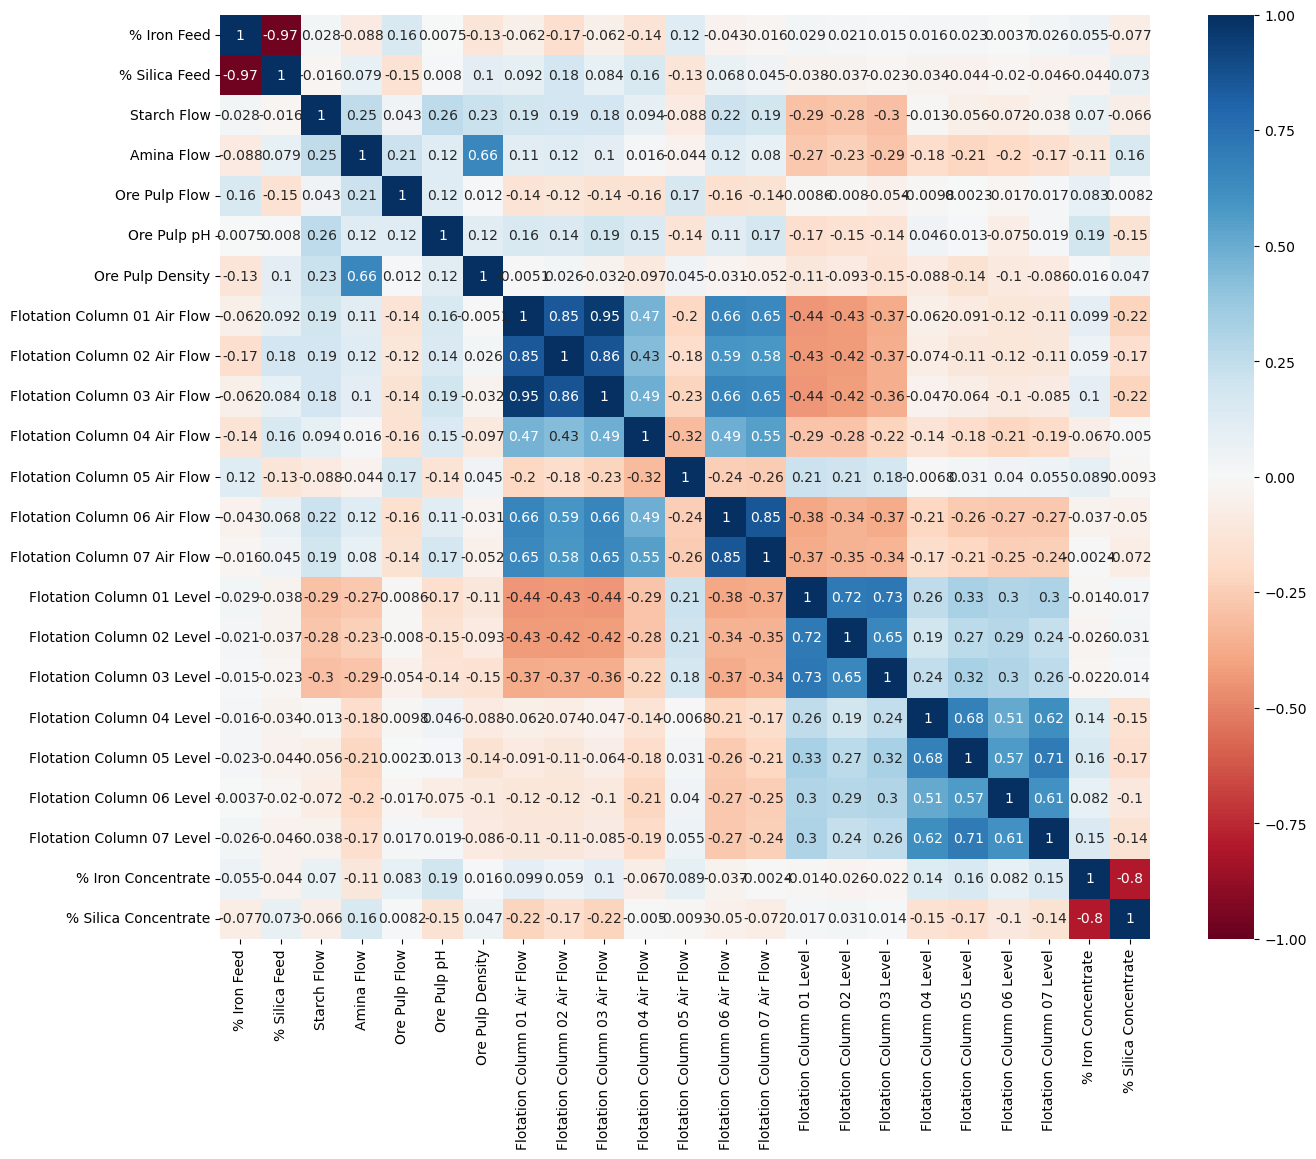

In [10]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(numeric_only=True),annot=True,vmin=-1,cmap='RdBu')
plt.show()  # Correlation heatmap

**Inferences**
* On account of being essentially a dynamic process, **there were no strong correlations** between variables and output.
* Moderate correlation between Ore density and Amina flow
* Air flow of all 7 columns is moderately correlated with each other.
* Column level of all 7 columns is moderately correlated with each other.

### 1. Feed Composition Consistency
- **% Iron Feed and % Silica Feed show a very strong negative correlation (≈ −0.97)**.
- This confirms the physical and chemical consistency of the ore, where iron and silica act as complementary components.
- The strong inverse relationship validates the reliability of the dataset and the absence of major data quality issues.

---

### 2. Weak Direct Relationship Between Feed and Final Silica
- The correlation between **% Silica Feed and % Silica Concentrate is weak (≈ +0.07)**.
- This indicates that final impurity levels are **not solely determined by feed quality**.
- Instead, operational controls such as reagents, air flow, and froth level play a dominant role in impurity reduction.

---

### 3. Reagent Behavior Reflects Reverse Flotation Logic
- **Amina Flow shows a positive correlation with % Silica Concentrate (≈ +0.16)**.
  - This suggests reactive control: higher amina dosage is applied when silica risk is high.
- **Starch Flow exhibits a weak negative correlation with silica concentrate**, indicating its primary role is iron depression rather than direct silica control.
- These patterns align with the expected chemistry of a **reverse flotation process**.

---

### 4. pH as a Stabilizing Variable
- **Ore Pulp pH has a mild negative correlation with % Silica Concentrate (≈ −0.15)**.
- Higher alkaline pH improves collector efficiency, slightly reducing silica carry-over.
- The relatively weak correlation reflects tight pH control in plant operation.
---

### 5. Throughput Has Minimal Direct Influence
- **Ore Pulp Flow shows near-zero correlation with silica concentrate**
---

### 6. Air Flow Is a Key Mechanical Driver
- Air flows in flotation columns (especially Columns 01–03) show **moderate negative correlation with % Silica Concentrate (≈ −0.20)**.
- Increased air flow enhances silica flotation, reducing its presence in the iron concentrate.
- Columns 04 and 05 show near-zero correlation, indicating fixed or stabilizing operational roles.

---

### 7. Froth Level Influences Entrainment
- Flotation column levels exhibit **weak to moderate negative correlations with silica concentrate**.
- Lower froth levels are associated with drier froth and reduced silica entrainment.
- The distributed effect across multiple columns suggests system-wide interaction rather than isolated control.

---

### 8. Strong Inter-Column Dependency
- Air flow and level variables show **high correlations across columns (0.6–0.95)**.
- This suggests that flotation columns might operate as a **coupled system**, not as independent units.

---

### 9. Output Relationship Confirms Process Objective
- **% Iron Concentrate and % Silica Concentrate exhibit a strong negative correlation (≈ −0.80)**.
- This confirms that effective silica removal directly improves iron grade.
- It validates the selection of % Silica Concentrate as the primary optimization target.



# Univariate Analysis

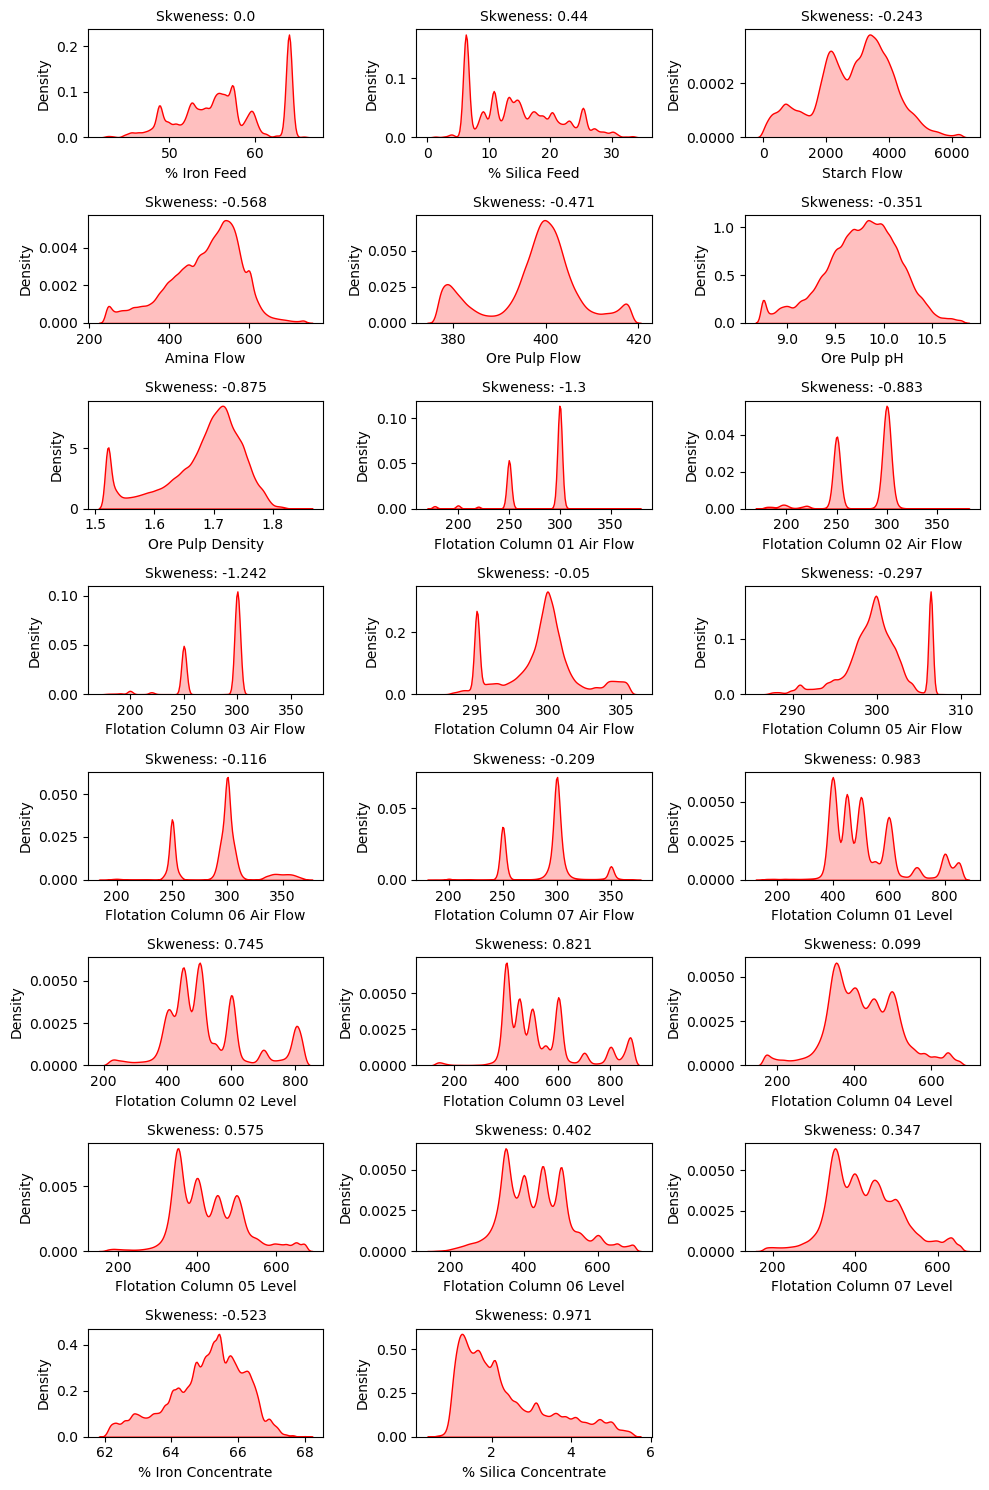

In [11]:
t=1
plt.figure(figsize=(10,15))

for i in data.columns:
    plt.subplot(8,3,t)
    sns.kdeplot(data=data,x=i,fill=True,color='red')
    skew = data[i].skew()
    plt.title(f'Skweness: {round(skew,3)}', fontsize=10)
    t+=1
plt.tight_layout()
plt.show()

**Inferences**
1. Starch flow is negatively skewed, there are values around 0 as well; this could indicate failures?
2. Air Flow in all the columns have sharp peaks; that means there are some set operation points for this setting.
3. In **columns 1, 2, 3 air flow is highly negatively skewed**, this tells us that these are the columns where settings are being changed the most: this is likely where the majority of the filteration happens
3. Floatation Column level in column 1,2 and 3 again is highly positively skewed; this indicates that these columns are where the level is primarily controlled in the first three columns, where settings the process stabilize.

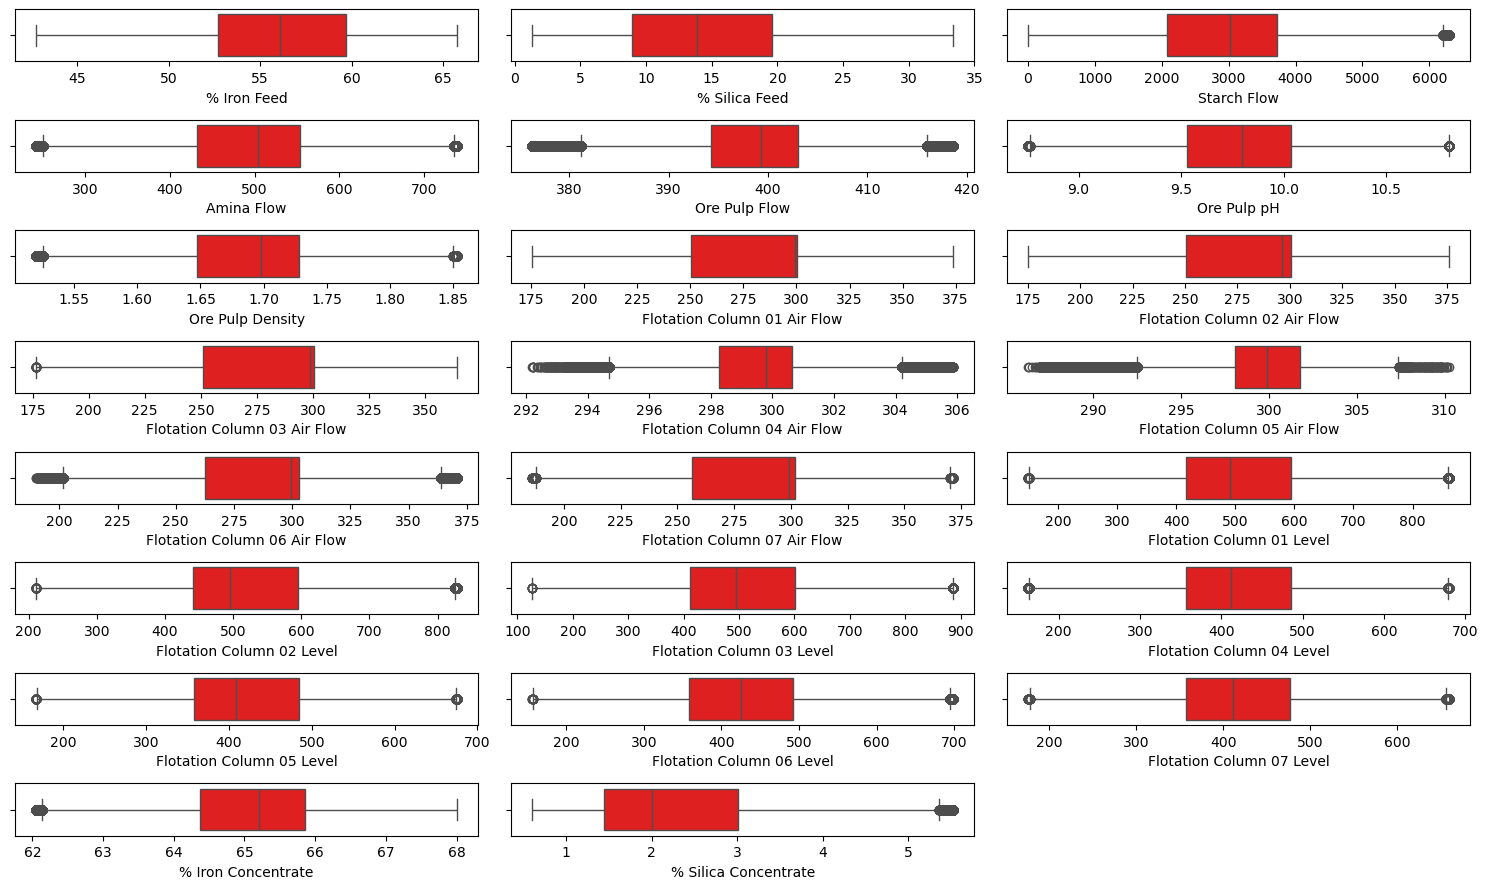

In [12]:
plt.figure(figsize=(15,9))

t = 1
for i in data.columns:
    plt.subplot(8,3,t)
    sns.boxplot(data=data,x=i,fill=True,color = 'red')
    t+=1

plt.tight_layout()
plt.show()

**Inferences**
1. We have outliers in the data, largely in the air flow of the columns

#Bivariate Analysis

**Inferences**
1. % Silica Concentrate (Impurites) is not clearly realted to any one column.

In [13]:
# Data Preprocessing

In [14]:
data.isnull().sum()

% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [15]:
# there are no missing values in the data


In [16]:
# there are no category column hence no encoding is needed

In [17]:
# we can see there is skewness as well as outlier 
# what we can do is use PowerTransformer(yeo-johnson) it will reduce skewness as well as reduce the influence 
# of extreme outliers

In [18]:
data.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [19]:
data = data.drop(columns='% Iron Concentrate') # we will be predicting silica Concentrate

In [20]:
data.head(2)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,1.31


In [21]:
x = data.drop(columns='% Silica Concentrate')

In [22]:
y= data['% Silica Concentrate']

In [23]:
transformer = PowerTransformer()

In [24]:
x_t = transformer.fit_transform(x)

In [25]:
x_t= pd.DataFrame(x_t,columns=x.columns)

In [26]:
x_t.head(2) #  transformed Predcitors

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,-0.207346,0.47294,0.117040,0.754116,-0.276726,0.758515,0.918686,-1.293228,-0.966266,-1.339231,...,1.890531,-1.371085,-1.368515,-0.392762,-0.663661,-0.673948,0.261408,0.936451,0.245439,1.188536
1,-0.207346,0.47294,0.121082,0.840077,-0.103846,0.760811,0.918686,-1.283373,-1.035394,-1.334244,...,1.890531,-1.373849,-1.428543,-0.444718,-0.695918,-0.610386,0.310406,0.874676,0.240568,0.919064


# Predictive Modeling

In [27]:
# Train Test Split

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=.70,random_state=2)

In [29]:
print(x_train.shape ,y_train.shape, x_test.shape, y_test.shape)

(516217, 21) (516217,) (221236, 21) (221236,)


In [30]:
# now lets do one more split for hyper parameter tuning

In [31]:
x_val , x_n , y_val , y_n = train_test_split(x_test,y_test,train_size=12000,random_state=2,shuffle=True) # lets 12000 rows for hyper parameter tuning

In [32]:
print(x_val.shape ,y_val.shape, y_n.shape, y_val.shape)

(12000, 21) (12000,) (209236,) (12000,)


# Base Model

In [33]:
# Lets Take Linear Regression as a BaseModel

In [34]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [35]:
pred = model_lr.predict(x_train)
print('R2_score  :',r2_score(y_train,pred))
print('MAE       :',mean_absolute_error(y_train,pred))
print('MAPE      :',mean_absolute_percentage_error(y_train,pred))
print('RMSE      :',root_mean_squared_error(y_train,pred))# Train Score

R2_score  : 0.15328805991415562
MAE       : 0.8191605454729708
MAPE      : 0.402294243434901
RMSE      : 1.0354801032677763


In [36]:
pred = model_lr.predict(x_test)
print('R2_score  :',r2_score(y_test,pred))
print('MAE       :',mean_absolute_error(y_test,pred))
print('MAPE      :',mean_absolute_percentage_error(y_test,pred))
print('RMSE      :',root_mean_squared_error(y_test,pred))# Test Score

R2_score  : 0.15195960428895872
MAE       : 0.8207255884544709
MAPE      : 0.4026173746880604
RMSE      : 1.0370208135916033


In [37]:
# Linear Regression performing poorly in both train and test so we can say that Linear regression is not able capture the complexity of 
# the Data lets fit more complex model Next (Decision Tree)

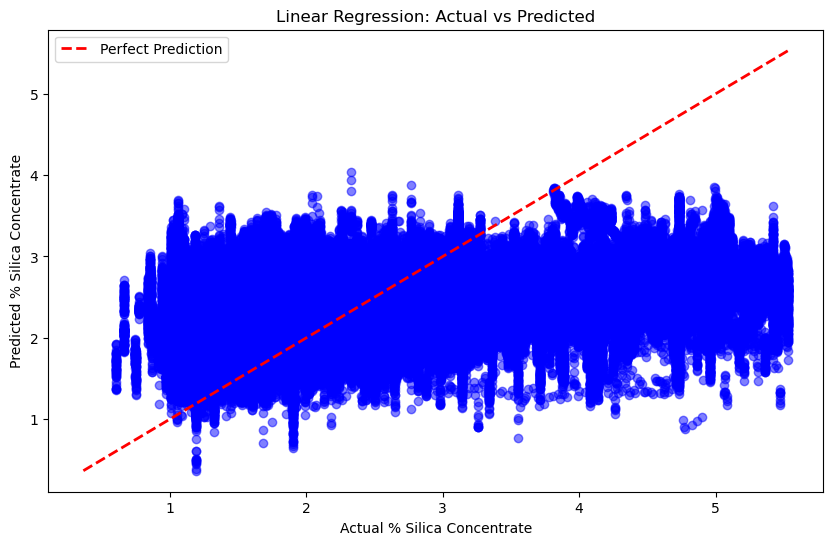

In [38]:

plt.figure(figsize=(10, 6))

plt.scatter(y_test, pred, alpha=0.5, color='blue')
lower_limit = min(y_test.min(), pred.min())
upper_limit = max(y_test.max(), pred.max())
plt.plot([lower_limit, upper_limit], [lower_limit, upper_limit], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual % Silica Concentrate')
plt.ylabel('Predicted % Silica Concentrate')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [39]:
# Linear regression  not Performing Well

In [40]:
pd.DataFrame(model_lr.coef_, index=x_train.columns, columns=['Coefficient'])

,Coefficient
% Iron Feed,-0.001874
% Silica Feed,0.008688
Starch Flow,-0.000038
Amina Flow,0.003267
Ore Pulp Flow,-0.004551
Ore Pulp pH,-0.324525
Ore Pulp Density,-1.968298
Flotation Column 01 Air Flow,-0.008791
Flotation Column 02 Air Flow,0.001014
Flotation Column 03 Air Flow,-0.005449


# Decision Tree 

In [41]:
grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11]}

In [42]:
gscv = GridSearchCV(estimator=DecisionTreeRegressor(random_state=2),param_grid=grid,cv=6,verbose=0,scoring='r2',n_jobs=-1)

In [43]:
gscv.fit(x_val,y_val)
print(gscv.best_params_)
print('Best Score :',gscv.best_score_)
best_params = gscv.best_params_

{'max_depth': 11}
Best Score : 0.2842346679809712


In [44]:
model_dt = DecisionTreeRegressor(random_state=2,**best_params)

In [45]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=11, random_state=2)

In [46]:
pred_dt = model_dt.predict(x_train)
print('R2_score  :',r2_score(y_train,pred_dt))
print('MAE       :',mean_absolute_error(y_train,pred_dt))
print('MAPE      :',mean_absolute_percentage_error(y_train,pred_dt))
print('RMSE      :',root_mean_squared_error(y_train,pred_dt))# Train Score

R2_score  : 0.5095275548472942
MAE       : 0.5555890758159087
MAPE      : 0.2751019822872378
RMSE      : 0.7880998105673781


In [47]:
pred_dt = model_dt.predict(x_test)
print('R2_score  : ',r2_score(y_test,pred_dt))
print('MAE       : ',mean_absolute_error(y_test,pred_dt))
print('MAPE      :',mean_absolute_percentage_error(y_test,pred_dt))
print('RMSE      :',root_mean_squared_error(y_test,pred_dt))# Test Score

R2_score  :  0.5011411002376815
MAE       :  0.5614805771685102
MAPE      : 0.2777663233566296
RMSE      : 0.795367910667827


In [48]:
pd.DataFrame(model_dt.feature_importances_,index=x_train.columns)

,0
% Iron Feed,0.114684
% Silica Feed,0.139023
Starch Flow,0.013718
Amina Flow,0.122130
Ore Pulp Flow,0.005663
Ore Pulp pH,0.092909
Ore Pulp Density,0.042374
Flotation Column 01 Air Flow,0.017552
Flotation Column 02 Air Flow,0.000767
Flotation Column 03 Air Flow,0.096078


In [49]:
# our decision tree is not performing very good in both train and test score but it is performing better
# compared to linear regression

# Random Forest (Ensemble Technique)

In [50]:
grid = {'max_depth':[7,8,9,10,11,12],'n_estimators':[100,150,200,300,500]}

In [51]:
gscv = GridSearchCV(estimator=RandomForestRegressor(random_state=2),param_grid=grid,cv=6,verbose=0,scoring='r2',n_jobs=-1)

In [52]:
gscv.fit(x_val,y_val)
print(gscv.best_params_)
print('Best Score :',gscv.best_score_)
best_params = gscv.best_params_

{'max_depth': 12, 'n_estimators': 500}
Best Score : 0.4762672010961369


In [53]:
model_rf = RandomForestRegressor(random_state=2,**best_params,n_jobs=-1)
model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, n_estimators=500, n_jobs=-1, random_state=2)

In [54]:
pred_rf = model_rf.predict(x_train)
print('R2_score  :',r2_score(y_train,pred_rf))
print('MAE       :',mean_absolute_error(y_train,pred_rf))
print('MAPE      :',mean_absolute_percentage_error(y_train,pred_rf))
print('RMSE      :',root_mean_squared_error(y_train,pred_rf))# Train Score

R2_score  : 0.6319123906110572
MAE       : 0.4813305474764617
MAPE      : 0.24029246961463765
RMSE      : 0.6827308312903265


In [55]:
pred_rf = model_rf.predict(x_test)
print('R2_score  :',r2_score(y_test,pred_rf))
print('MAE       :',mean_absolute_error(y_test,pred_rf))
print('MAPE      :',mean_absolute_percentage_error(y_test,pred_rf))
print('RMSE      :',root_mean_squared_error(y_test,pred_rf))# Test Score

R2_score  : 0.6251166527507639
MAE       : 0.4869294032157604
MAPE      : 0.24287523674686637
RMSE      : 0.689488897755914


In [56]:
pd.DataFrame(model_rf.feature_importances_,index=x_train.columns)

,0
% Iron Feed,0.109119
% Silica Feed,0.151370
Starch Flow,0.017028
Amina Flow,0.116277
Ore Pulp Flow,0.008710
Ore Pulp pH,0.093583
Ore Pulp Density,0.052457
Flotation Column 01 Air Flow,0.015292
Flotation Column 02 Air Flow,0.003109
Flotation Column 03 Air Flow,0.086692


# XG Boost

In [57]:
grid = {'max_depth':[2,3,7,8,9,10,11,12],'min_child_weight': [1, 3, 5, 7]}
gscv = GridSearchCV(estimator=XGBRegressor(),param_grid=grid,cv=6,verbose=0,scoring='r2',n_jobs=-1)
gscv.fit(x_val,y_val)
print(gscv.best_params_)
print('Best Score :',gscv.best_score_)
best_params = gscv.best_params_

{'max_depth': 11, 'min_child_weight': 5}
Best Score : 0.5439032994746141


In [58]:
grid = {'subsample': [0.5, 0.7, 1.0],'colsample_bytree': [0.5, 0.7, 1.0]}
gscv = GridSearchCV(estimator=XGBRegressor(**best_params),param_grid=grid,cv=6,verbose=0,scoring='r2',n_jobs=-1)
gscv.fit(x_val,y_val)
print(gscv.best_params_)
print('Best Score :',gscv.best_score_)
best_params2 = gscv.best_params_

{'colsample_bytree': 1.0, 'subsample': 1.0}
Best Score : 0.5439032994746141


In [59]:
grid = {'gamma': [0, 0.1, 0.2, 0.5, 1],'learning_rate':[0.01, 0.02, 0.05,0.1, 0.2,0.3]}
gscv = GridSearchCV(estimator=XGBRegressor(**best_params,**best_params2),param_grid=grid,cv=6,verbose=0,scoring='r2',n_jobs=-1)
gscv.fit(x_val,y_val)
print(gscv.best_params_)
print('Best Score :',gscv.best_score_)
best_params3 = gscv.best_params_

{'gamma': 0, 'learning_rate': 0.1}
Best Score : 0.5749683304219804


In [60]:
grid = {'reg_alpha': [0, 0.01, 0.05, 0.1, 0.5, 1],'reg_lambda': [0,0.1,0.5, 1, 1.5, 2, 3]}
gscv = GridSearchCV(estimator=XGBRegressor(**best_params,**best_params2,**best_params3),param_grid=grid,cv=6,verbose=0,scoring='r2',n_jobs=-1)
gscv.fit(x_val,y_val)
print(gscv.best_params_)
print('Best Score :',gscv.best_score_)
best_params4 = gscv.best_params_

{'reg_alpha': 0, 'reg_lambda': 3}
Best Score : 0.5783490780782691


In [61]:
grid = {'n_estimators': [100,150, 200, 300,500]}
gscv = GridSearchCV(estimator=XGBRegressor(**best_params,**best_params2,**best_params3,**best_params4),param_grid=grid,cv=6,verbose=0,scoring='r2',n_jobs=-1)
gscv.fit(x_val,y_val)
print(gscv.best_params_)
print('Best Score :',gscv.best_score_)
best_params5 = gscv.best_params_

{'n_estimators': 500}
Best Score : 0.5888554036904893


In [62]:
model_xgb = XGBRegressor(**best_params,**best_params2,**best_params3,**best_params4,**best_params5)
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=11,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [63]:
pred_xgb = model_xgb.predict(x_train)
print('R2_score  :',r2_score(y_train,pred_xgb))
print('MAE       :',mean_absolute_error(y_train,pred_xgb))
print('MAPE      :',mean_absolute_percentage_error(y_train,pred_xgb))
print('RMSE      :',root_mean_squared_error(y_train,pred_xgb))# Train Score

R2_score  : 0.9798974615999283
MAE       : 0.0975672682745576
MAPE      : 0.049265578395158514
RMSE      : 0.15955093973803183


In [64]:
pred_xgb = model_xgb.predict(x_test)
print('R2_score  :',r2_score(y_test,pred_xgb))
print('MAE       :',mean_absolute_error(y_test,pred_xgb))
print('MAPE      :',mean_absolute_percentage_error(y_test,pred_xgb))
print('RMSE      :',root_mean_squared_error(y_test,pred_xgb))# Test Score

R2_score  : 0.9407380526085843
MAE       : 0.16454873704801043
MAPE      : 0.08078566336392842
RMSE      : 0.2741366885043803


In [65]:
pd.DataFrame(model_xgb.feature_importances_,index=x_train.columns)

,0
% Iron Feed,0.132792
% Silica Feed,0.199105
Starch Flow,0.021235
Amina Flow,0.056261
Ore Pulp Flow,0.015711
Ore Pulp pH,0.047720
Ore Pulp Density,0.037654
Flotation Column 01 Air Flow,0.025023
Flotation Column 02 Air Flow,0.014603
Flotation Column 03 Air Flow,0.068994


In [66]:
# Fit Final Model on the Whole Data 

In [67]:
model_xgb = XGBRegressor(**best_params,**best_params2,**best_params3,**best_params4,**best_params5)
model_xgb.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=11,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [68]:
pred_xgb = model_xgb.predict(x)
print('R2_score  :',r2_score(y,pred_xgb))
print('MAE       :',mean_absolute_error(y,pred_xgb))
print('MAPE      :',mean_absolute_percentage_error(y,pred_xgb))
print('RMSE      :',root_mean_squared_error(y,pred_xgb))# Test Score

R2_score  : 0.977444014735742
MAE       : 0.10298448912060505
MAPE      : 0.05184140819726943
RMSE      : 0.1690428421520483


In [69]:
pd.DataFrame(model_xgb.feature_importances_,index=x_train.columns)

,0
% Iron Feed,0.127909
% Silica Feed,0.201666
Starch Flow,0.020383
Amina Flow,0.054360
Ore Pulp Flow,0.016116
Ore Pulp pH,0.047223
Ore Pulp Density,0.035160
Flotation Column 01 Air Flow,0.025006
Flotation Column 02 Air Flow,0.014044
Flotation Column 03 Air Flow,0.073628


In [70]:
explainer = shap.Explainer(model_xgb)
shap_values = explainer(x)

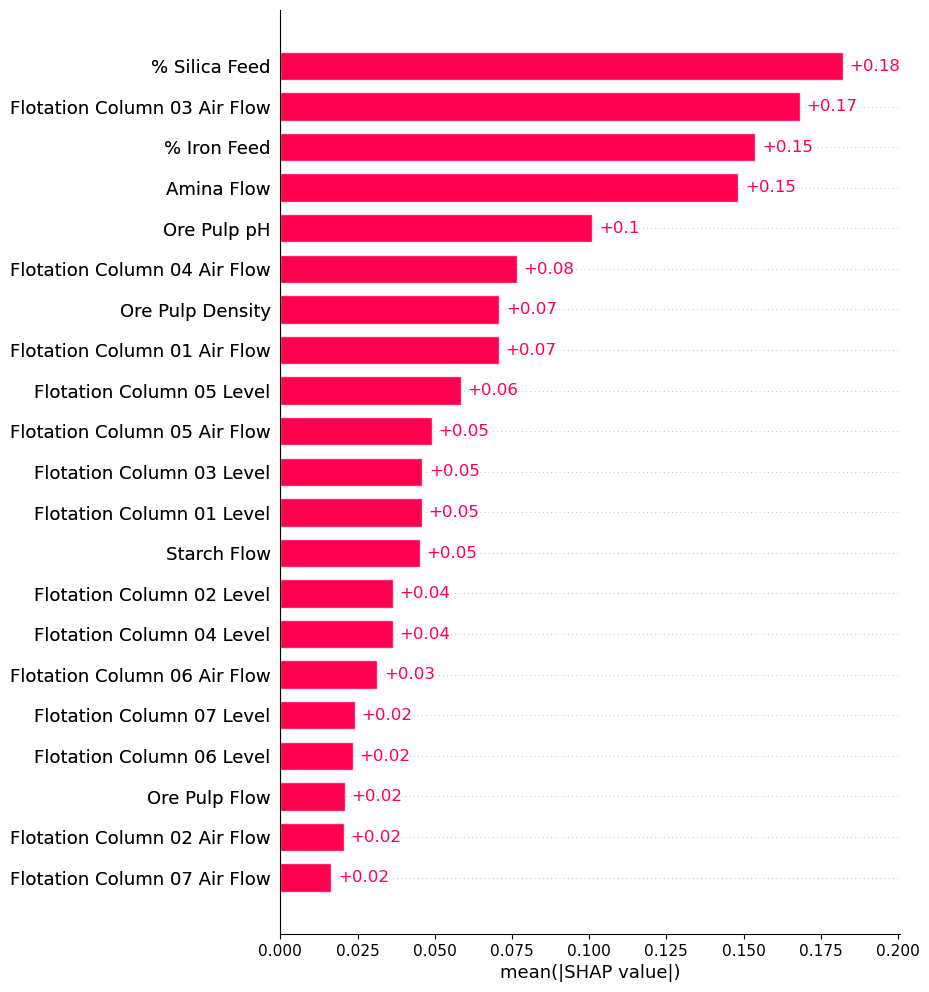

In [71]:
shap.plots.bar(shap_values,max_display=21)  #Top Features

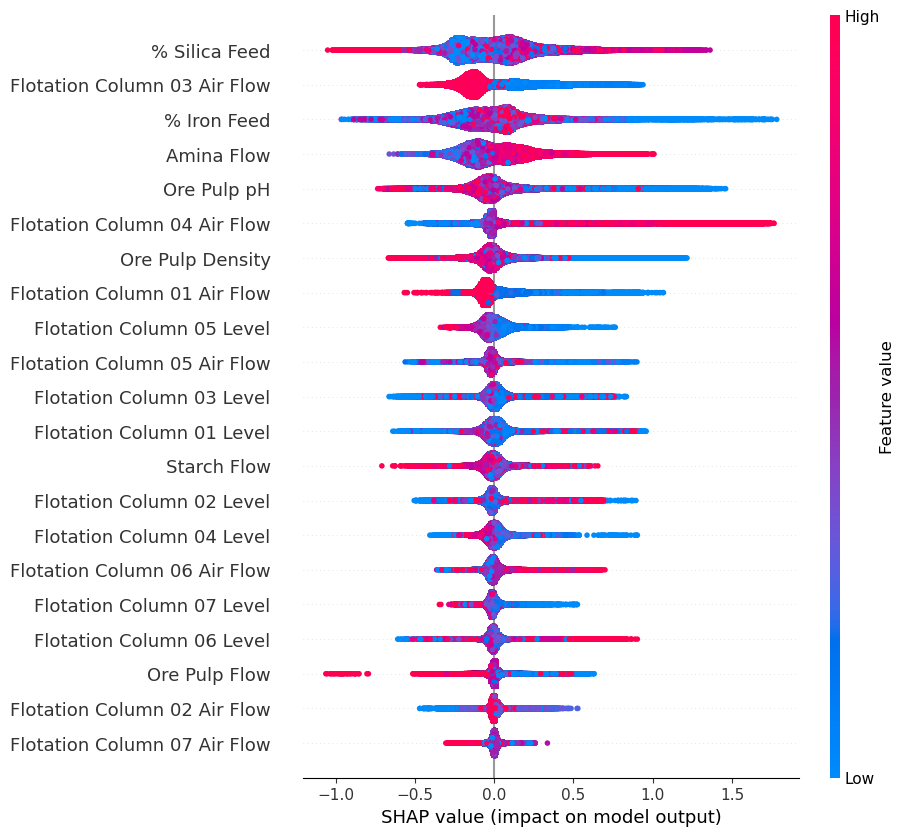

In [72]:
shap.plots.beeswarm(shap_values,max_display=21) # Direction 

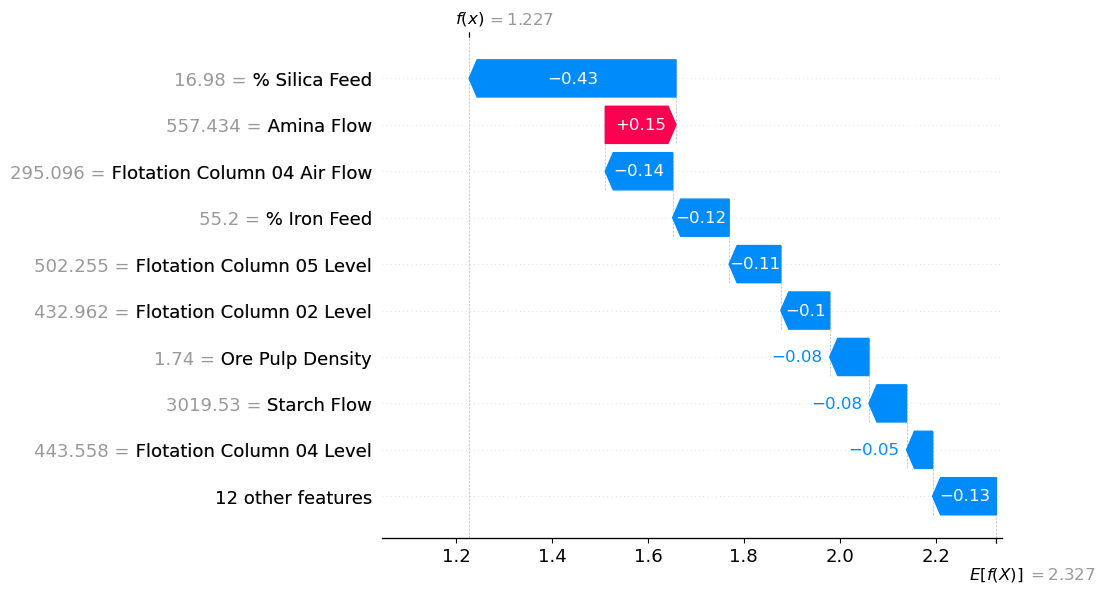

In [73]:
shap.plots.waterfall(shap_values[0])

In [74]:
def classify_risk(pred):
    if pred < 2.0:
        return "Low"
    elif pred < 3.0:
        return "Medium"
    else:
        return "High"

In [75]:


def get_top_drivers(shap_values_row, feature_names, top_k=4):
    values = shap_values_row.values
    idx = np.argsort(np.abs(values))[::-1][:top_k]

    drivers = []
    for i in idx:
        drivers.append({
            "feature": feature_names[i],
            "impact": float(values[i]),
        })
    return drivers


In [76]:
def enrich_driver_info(drivers, row_data):
    enriched = []
    for d in drivers:
        direction = "increasing silica" if d["impact"] > 0 else "reducing silica"
        enriched.append({
            "feature": d["feature"],
            "value": float(row_data[d["feature"]]),
            "impact": round(d["impact"], 3),
            "direction": direction
        })
    return enriched

In [98]:
pred = model_xgb.predict(x.iloc[152639:152640])

In [99]:
risk_level = classify_risk(pred)

In [100]:
print(risk_level)

High


In [101]:
feature_name = x.columns.tolist()

In [102]:
drivers = get_top_drivers(shap_values[0],feature_names=feature_name)

In [103]:
print(drivers)

[{'feature': '% Silica Feed', 'impact': -0.4316357672214508}, {'feature': 'Amina Flow', 'impact': 0.14759474992752075}, {'feature': 'Flotation Column 04 Air Flow', 'impact': -0.1406349092721939}, {'feature': '% Iron Feed', 'impact': -0.11780454963445663}]


In [104]:
top_features = enrich_driver_info(drivers, row_data=x.iloc[152639:152640])

In [105]:
print(top_features)

[{'feature': '% Silica Feed', 'value': 11.85, 'impact': -0.432, 'direction': 'reducing silica'}, {'feature': 'Amina Flow', 'value': 519.84, 'impact': 0.148, 'direction': 'increasing silica'}, {'feature': 'Flotation Column 04 Air Flow', 'value': 299.714, 'impact': -0.141, 'direction': 'reducing silica'}, {'feature': '% Iron Feed', 'value': 58.05, 'impact': -0.118, 'direction': 'reducing silica'}]


In [122]:
prompt = f'''You are a flotation process decision-support assistant have in depth knowledge in reverse flotation of iron mining. 

Predicted Silica Level: {pred}
Risk Level: {risk_level}

Key Contributing Factors:
{top_features}

measurement metrics
Starch (reagent) Flow measured in m3/h
Amina (reagent) Flow measured in m3/h
Ore Pulp Flow Rate - t/h
Ore Pulp pH Level- pH scale from 0 to 14
Ore Pulp Density- Density scale from 1 to 3 kg/cm³
Air flow that goes into the flotation column measured in Nm³/h
Froth level in the flotation column measured in mm



Generate a concise operational recommendation to achieve lower silica impurity.
Guidelines:
- Suggest cautious, incremental adjustments only.(provide numerical range with increase or reduce direction)
- Do NOT recommend extreme parameter changes.
- Do NOT claim causal certainty.
- Frame guidance as advisory for human operators.
- Keep response under 200 words.
- do not suggest any change in silica fee and iron feed as it is out of control
- a tabular format what, how much and direction to change  '''

In [112]:
gemini_key = os.getenv('Google_API_KEY1')
genai.configure(api_key=gemini_key)
model = genai.GenerativeModel('gemini-2.5-flash-lite')

In [123]:
response = model.generate_content(prompt)
print(response.text)

Given the high risk of silica impurity, it is advisable to cautiously adjust the following parameters to aim for lower silica levels:

| Parameter                 | Recommended Action | Magnitude      |
| :------------------------ | :----------------- | :------------- |
| Amina Flow                | Reduce             | By 5-10 m³/h   |
| Flotation Column 04 Air Flow | Increase           | By 10-20 Nm³/h |

These adjustments are suggested to mitigate the observed impact of Amina Flow and Flotation Column 04 Air Flow on silica levels. Please monitor the silica levels closely after making these incremental changes.


In [125]:
joblib.dump(explainer, 'shap_explainer.pkl')

['shap_explainer.pkl']

In [126]:
joblib.dump(model_xgb,'model_xgb.pkl')

['model_xgb.pkl']

In [127]:
joblib.dump(transformer, 'transformer.pkl')

['transformer.pkl']